In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup

#355c70 blue
#ff5a5e darker pink
#C06C85
#f67280 pink
#F8B195 light orange

In [2]:
#read in the csv file

df = pd.read_csv('subventions-accordees-et-refusees.csv', 
                     delimiter=';')
df.head(5)

,Numérodedossier,Annéebudgétaire,Collectivité,NomBénéficiaire,NuméroSiret,Objetdudossier,Montantvoté,Direction,Naturedesubvention,Secteursd'activités
0,2020_08341,2020,Ville de Paris,129 H PRODUCTIONS,44326922000036,Appel à projet Mois d'août de la culture 2020,3000,DAC,Projet,Culture & Arts;Education & formation;Vie et an...
1,2020_05033,2020,Ville de Paris,4 A 4 DIX HUIT,48909505900015,De Mômes et d'opérette : Des grottes de Lascau...,0,DAC,Non précisée,Culture & Arts;Social;Sport
2,2020_00016,2020,Ville de Paris,ACADEMIE FOOTBALL PARIS 18 (AFP18),81111744900017,FOOTELLES EN HERBE,0,DJS,Non précisée,Culture & Arts;Education & formation;Sport
3,2020_03808,2020,Ville de Paris,ACTIONS DE SOLIDARITE INTERNATIONALE ASI,38969111400034,Amélioration de la santé des filles et jeunes ...,30000,DGRI,Fonctionnement,Précarité & Exclusion;Santé;Social
4,2020_00766,2020,Ville de Paris,AGENCE DE DEVELOPPEMENT DES RELATIONS INTERCUL...,45190253000026,Favoriser l'accès à la citoyenneté des personn...,1500,DDCT,Projet,Education & formation;Social


In [4]:
#EXTRACT
df = df.loc[df['Montantvoté'] > 0]
df

,Numérodedossier,Annéebudgétaire,Collectivité,NomBénéficiaire,NuméroSiret,Objetdudossier,Montantvoté,Direction,Naturedesubvention,Secteursd'activités
0,2020_08341,2020,Ville de Paris,129 H PRODUCTIONS,44326922000036,Appel à projet Mois d'août de la culture 2020,3000,DAC,Projet,Culture & Arts;Education & formation;Vie et an...
3,2020_03808,2020,Ville de Paris,ACTIONS DE SOLIDARITE INTERNATIONALE ASI,38969111400034,Amélioration de la santé des filles et jeunes ...,30000,DGRI,Fonctionnement,Précarité & Exclusion;Santé;Social
4,2020_00766,2020,Ville de Paris,AGENCE DE DEVELOPPEMENT DES RELATIONS INTERCUL...,45190253000026,Favoriser l'accès à la citoyenneté des personn...,1500,DDCT,Projet,Education & formation;Social
5,2020_06939,2020,Ville de Paris,AGENCE POUR LA PROMOTION DE LA CREATION INDUST...,32874761300060,Subvention APCI,7000,DAE,Fonctionnement,Culture & Arts;Economie;Environnement & écologie
7,2020_05406,2020,Ville de Paris,ALTERALIA,35355631900021,Création d'un MISA pour familles et personnes ...,490000,DASES,Investissement,Précarité & Exclusion;Social;Tourisme
...,...,...,...,...,...,...,...,...,...,...
65380,2020_02428,2020,Ville de Paris,UNION SPORTIVE CURIAL CAMBRAI USCC,32730032300034,Amélioration et développement des sections,3000,DJS,Fonctionnement,Loisirs;Sport
65381,2020_01853,2020,Ville de Paris,VENI VERDI,52978846500043,Agriculture urbaine au collège Flora Tristan,2000,DDCT,Projet,Environnement & écologie;Social;Vie et animati...
65382,2020_01856,2020,Ville de Paris,VERGERS URBAINS,79483864900018,ANIMATIONS CHARLES HERMITE,2500,DDCT,Projet,Architecture & urbanisme;Environnement & écolo...
65383,2020_01858,2020,Ville de Paris,VERGERS URBAINS,79483864900018,Les ateliers au jardin Chaufourniers,1000,DDCT,Projet,Architecture & urbanisme;Environnement & écolo...


In [5]:
df.to_csv('dossier_positive.csv')

# NLTK - run code from here

In [6]:
###run code from here

import numpy as np
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#355c70 blue
#ff5a5e darker pink
#C06C85
#f67280 pink
#F8B195 light orange

#read in the csv file

#Proof of payment (yes=1) 
#Nested comments: if 0, it's a notice, if other number: it's a reply to the notice corresponding to the comment number indicated
#Rating associated with the review (from 1 to 5 stars)


In [7]:
df = df.Objetdudossier
df.head()

0        Appel à projet Mois d'août de la culture 2020
3    Amélioration de la santé des filles et jeunes ...
4    Favoriser l'accès à la citoyenneté des personn...
5                                      Subvention APCI
7    Création d'un MISA pour familles et personnes ...
Name: Objetdudossier, dtype: object

In [8]:
df = df.dropna() #drop nan
df.head()
len(df)

40298

In [9]:
wc = ' '.join(df.tolist())
type(wc)
#commentwc.split()
# wc = wc.replace('.Raison :', '',)

str

In [10]:
#dont print if it's too large or else the program will break
#commentwc

In [11]:
#textfile = open('textfile.txt', 'w')
##textfile.write(commentwc)
#textfile.close()

In [12]:
#Plotting Frequencies

#all_words = comment
#len(all_words)

In [10]:
wc.split()
#for t in commentwc:
#    t = t.strip('\'"?,.!_+=-')
#   print(w)

['Appel',
 'à',
 'projet',
 'Mois',
 "d'août",
 'de',
 'la',
 'culture',
 '2020',
 'Amélioration',
 'de',
 'la',
 'santé',
 'des',
 'filles',
 'et',
 'jeunes',
 'femmes',
 'en',
 'prostitution',
 'de',
 'survie',
 'à',
 'Brazzaville,',
 'Congo',
 'Favoriser',
 "l'accès",
 'à',
 'la',
 'citoyenneté',
 'des',
 'personnes',
 'migrantes',
 '(2020)',
 'Subvention',
 'APCI',
 'Création',
 "d'un",
 'MISA',
 'pour',
 'familles',
 'et',
 'personnes',
 'isolées',
 'sans-abris',
 'INVESTISSEMENT',
 'Soutien',
 'aux',
 'activités',
 "d'escrime",
 'sportive',
 'de',
 "l'amicale",
 'Edouard',
 'Petit',
 '-',
 'AEP',
 'Subvention',
 'de',
 'fonctionnement',
 'Kellerman',
 'fait',
 'son',
 'Cinéma',
 'Fonds',
 'de',
 'participation',
 'des',
 'habitants',
 'du',
 '10è',
 'arrondissement',
 '2020',
 'Journées',
 'de',
 "l'Artisanat",
 'à',
 'Belleville',
 'développement',
 'et',
 'diffusion',
 'des',
 'Arts',
 'Plastiques',
 'par',
 'le',
 'plus',
 'grand',
 'nombre',
 'd¿artistes',
 'en',
 '2020',
 'P

In [11]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imsd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
wc_words = nltk.word_tokenize(wc)
wc_words

['Appel',
 'à',
 'projet',
 'Mois',
 "d'août",
 'de',
 'la',
 'culture',
 '2020',
 'Amélioration',
 'de',
 'la',
 'santé',
 'des',
 'filles',
 'et',
 'jeunes',
 'femmes',
 'en',
 'prostitution',
 'de',
 'survie',
 'à',
 'Brazzaville',
 ',',
 'Congo',
 'Favoriser',
 "l'accès",
 'à',
 'la',
 'citoyenneté',
 'des',
 'personnes',
 'migrantes',
 '(',
 '2020',
 ')',
 'Subvention',
 'APCI',
 'Création',
 "d'un",
 'MISA',
 'pour',
 'familles',
 'et',
 'personnes',
 'isolées',
 'sans-abris',
 'INVESTISSEMENT',
 'Soutien',
 'aux',
 'activités',
 "d'escrime",
 'sportive',
 'de',
 "l'amicale",
 'Edouard',
 'Petit',
 '-',
 'AEP',
 'Subvention',
 'de',
 'fonctionnement',
 'Kellerman',
 'fait',
 'son',
 'Cinéma',
 'Fonds',
 'de',
 'participation',
 'des',
 'habitants',
 'du',
 '10è',
 'arrondissement',
 '2020',
 'Journées',
 'de',
 "l'Artisanat",
 'à',
 'Belleville',
 'développement',
 'et',
 'diffusion',
 'des',
 'Arts',
 'Plastiques',
 'par',
 'le',
 'plus',
 'grand',
 'nombre',
 'd¿artistes',
 'en

In [13]:
{word:True for word in wc_words}

{'Appel': True,
 'à': True,
 'projet': True,
 'Mois': True,
 "d'août": True,
 'de': True,
 'la': True,
 'culture': True,
 '2020': True,
 'Amélioration': True,
 'santé': True,
 'des': True,
 'filles': True,
 'et': True,
 'jeunes': True,
 'femmes': True,
 'en': True,
 'prostitution': True,
 'survie': True,
 'Brazzaville': True,
 ',': True,
 'Congo': True,
 'Favoriser': True,
 "l'accès": True,
 'citoyenneté': True,
 'personnes': True,
 'migrantes': True,
 '(': True,
 ')': True,
 'Subvention': True,
 'APCI': True,
 'Création': True,
 "d'un": True,
 'MISA': True,
 'pour': True,
 'familles': True,
 'isolées': True,
 'sans-abris': True,
 'INVESTISSEMENT': True,
 'Soutien': True,
 'aux': True,
 'activités': True,
 "d'escrime": True,
 'sportive': True,
 "l'amicale": True,
 'Edouard': True,
 'Petit': True,
 '-': True,
 'AEP': True,
 'fonctionnement': True,
 'Kellerman': True,
 'fait': True,
 'son': True,
 'Cinéma': True,
 'Fonds': True,
 'participation': True,
 'habitants': True,
 'du': True,
 '

In [14]:
type(_)

dict

In [15]:
def build_bag_of_words_features(words):
    return {word:True for word in words}

In [16]:
build_bag_of_words_features(wc_words)

{'Appel': True,
 'à': True,
 'projet': True,
 'Mois': True,
 "d'août": True,
 'de': True,
 'la': True,
 'culture': True,
 '2020': True,
 'Amélioration': True,
 'santé': True,
 'des': True,
 'filles': True,
 'et': True,
 'jeunes': True,
 'femmes': True,
 'en': True,
 'prostitution': True,
 'survie': True,
 'Brazzaville': True,
 ',': True,
 'Congo': True,
 'Favoriser': True,
 "l'accès": True,
 'citoyenneté': True,
 'personnes': True,
 'migrantes': True,
 '(': True,
 ')': True,
 'Subvention': True,
 'APCI': True,
 'Création': True,
 "d'un": True,
 'MISA': True,
 'pour': True,
 'familles': True,
 'isolées': True,
 'sans-abris': True,
 'INVESTISSEMENT': True,
 'Soutien': True,
 'aux': True,
 'activités': True,
 "d'escrime": True,
 'sportive': True,
 "l'amicale": True,
 'Edouard': True,
 'Petit': True,
 '-': True,
 'AEP': True,
 'fonctionnement': True,
 'Kellerman': True,
 'fait': True,
 'son': True,
 'Cinéma': True,
 'Fonds': True,
 'participation': True,
 'habitants': True,
 'du': True,
 '

In [17]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imsd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import string

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# #create a list of platforms to eliminate
plist = ['a', 'site', 'bonjour', "j'ai", 'plus', 'très',"c'est", 'je', 'euros', '1', '2', '5', '10', '...', '€', 'je', '``', 'bonsoir',
        '--',
        'ça',
        'le',
        '3',
        "''",
 ]

    # plist = list(dict.fromkeys(mylist))
 #print(plist)

In [21]:
useless_words = nltk.corpus.stopwords.words("french") + list(string.punctuation) + plist

In [22]:
def build_bag_of_words_features_filtered(words):
    return {
        word:1 for word in words \
        if not word in useless_words}

In [23]:
#build_bag_of_words_features_filtered(commentwc_words)

In [24]:
#this line would take looooong to process
filtered_words = [word for word in wc_words if not word in useless_words]
type(filtered_words)

list

In [25]:
len(filtered_words)

216646

In [26]:
filtered_words

['Appel',
 'projet',
 'Mois',
 "d'août",
 'culture',
 '2020',
 'Amélioration',
 'santé',
 'filles',
 'jeunes',
 'femmes',
 'prostitution',
 'survie',
 'Brazzaville',
 'Congo',
 'Favoriser',
 "l'accès",
 'citoyenneté',
 'personnes',
 'migrantes',
 '2020',
 'Subvention',
 'APCI',
 'Création',
 "d'un",
 'MISA',
 'familles',
 'personnes',
 'isolées',
 'sans-abris',
 'INVESTISSEMENT',
 'Soutien',
 'activités',
 "d'escrime",
 'sportive',
 "l'amicale",
 'Edouard',
 'Petit',
 'AEP',
 'Subvention',
 'fonctionnement',
 'Kellerman',
 'fait',
 'Cinéma',
 'Fonds',
 'participation',
 'habitants',
 '10è',
 'arrondissement',
 '2020',
 'Journées',
 "l'Artisanat",
 'Belleville',
 'développement',
 'diffusion',
 'Arts',
 'Plastiques',
 'grand',
 'nombre',
 'd¿artistes',
 '2020',
 'Prix',
 'vidéo',
 'Arts',
 'Convergences',
 '3ème',
 'édition',
 'Dases',
 'Seplex',
 'Accompagnement',
 'scolarité',
 '2019-2020',
 'POSTE',
 'ADULTE',
 'RELAIS',
 'CPO',
 'PDV',
 'blank',
 'Formation',
 'gratuite',
 'intensiv

In [27]:
filtered_lower = [x.lower() for x in filtered_words]
#print(filtered_lower)

In [28]:
from collections import Counter
word_count_dict = Counter(filtered_lower)
word_count_dict.most_common()[:50]

[('fonctionnement', 7471),
 ('paris', 3219),
 ('subvention', 2567),
 ('de', 1724),
 ('ateliers', 1600),
 ('jeunes', 1539),
 ('projet', 1440),
 ('quartier', 1393),
 ('la', 1371),
 ('aap', 1284),
 ("d'un", 1229),
 ('cpo', 1203),
 ('social', 1175),
 ('fonds', 1090),
 ('demande', 1036),
 ('lien', 1036),
 ('2019', 1010),
 ('atelier', 999),
 ('les', 980),
 ('pvi', 979),
 ('aide', 971),
 ('festival', 962),
 ('maire', 960),
 ('2018', 931),
 ('accompagnement', 889),
 ('poste', 872),
 ('femmes', 859),
 ('convention', 853),
 ('le', 846),
 ('rue', 841),
 ('culture', 838),
 ('et', 837),
 ('vvv', 822),
 ('ville', 753),
 ('2017', 737),
 ('création', 726),
 ('2016', 710),
 ('2020', 701),
 ('co-financement', 697),
 ('des', 667),
 ('enfants', 638),
 ('2015', 625),
 ('soutien', 622),
 ('théâtre', 622),
 ('are', 622),
 ('financement', 605),
 ('développement', 594),
 ('personnes', 592),
 ('du', 589),
 ('contre', 584)]

In [29]:
# #create a list of platforms to eliminate
plist = ['a', 'site', 'bonjour', "j'ai", 'plus', 'très',"c'est", 'je', 'euros', '1', '2', '5', '10', '...', '€', 'je', '``', 'bonsoir',
        '--',
        'ça',
        'le',
        '3',
        "''",
 ]

    # plist = list(dict.fromkeys(mylist))
 #print(plist)

In [30]:
filtered_words1 = [word for word in filtered_words if not word in plist]

In [31]:
filtered_lower1 = [x.lower() for x in filtered_words1]

In [32]:
filtered_upper = [x.upper() for x in filtered_words1]

In [33]:
word_count_dict1 = Counter(filtered_upper)
word_count_dict1.most_common()[:50]

[('FONCTIONNEMENT', 7471),
 ('PARIS', 3219),
 ('SUBVENTION', 2567),
 ('DE', 1724),
 ('ATELIERS', 1600),
 ('JEUNES', 1539),
 ('PROJET', 1440),
 ('QUARTIER', 1393),
 ('LA', 1371),
 ('AAP', 1284),
 ("D'UN", 1229),
 ('CPO', 1203),
 ('SOCIAL', 1175),
 ('FONDS', 1090),
 ('DEMANDE', 1036),
 ('LIEN', 1036),
 ('2019', 1010),
 ('ATELIER', 999),
 ('LES', 980),
 ('PVI', 979),
 ('AIDE', 971),
 ('FESTIVAL', 962),
 ('MAIRE', 960),
 ('2018', 931),
 ('ACCOMPAGNEMENT', 889),
 ('POSTE', 872),
 ('FEMMES', 859),
 ('CONVENTION', 853),
 ('LE', 846),
 ('RUE', 841),
 ('CULTURE', 838),
 ('ET', 837),
 ('VVV', 822),
 ('VILLE', 753),
 ('2017', 737),
 ('CRÉATION', 726),
 ('2016', 710),
 ('2020', 701),
 ('CO-FINANCEMENT', 697),
 ('DES', 667),
 ('ENFANTS', 638),
 ('2015', 625),
 ('SOUTIEN', 622),
 ('THÉÂTRE', 622),
 ('ARE', 622),
 ('FINANCEMENT', 605),
 ('DÉVELOPPEMENT', 594),
 ('PERSONNES', 592),
 ('DU', 589),
 ('CONTRE', 584)]

In [34]:
# filtered = [w for w in filtered_words if nonPunct.match(w)]
# filtered.sort()
# counts = Counter(filtered)

In [35]:
# visualization 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

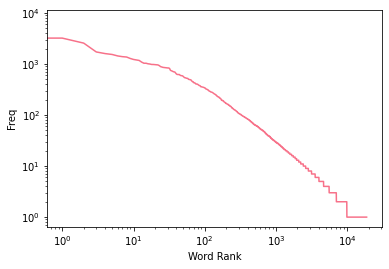

In [36]:
sorted_word_counts = sorted(list(word_count_dict1.values()), reverse=True)

with sns.color_palette("husl", 8): 
    plt.loglog(sorted_word_counts)
    plt.ylabel("Freq")
    plt.xlabel("Word Rank");

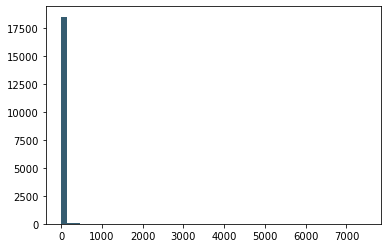

In [37]:
plt.hist(sorted_word_counts, bins=50, color = '#355c70');

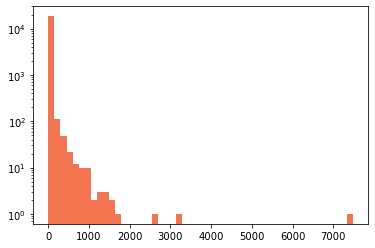

In [38]:
plt.hist(sorted_word_counts, bins=50, log=True, color = '#f37450' );

In [39]:
filtered_upper

['APPEL',
 'PROJET',
 'MOIS',
 "D'AOÛT",
 'CULTURE',
 '2020',
 'AMÉLIORATION',
 'SANTÉ',
 'FILLES',
 'JEUNES',
 'FEMMES',
 'PROSTITUTION',
 'SURVIE',
 'BRAZZAVILLE',
 'CONGO',
 'FAVORISER',
 "L'ACCÈS",
 'CITOYENNETÉ',
 'PERSONNES',
 'MIGRANTES',
 '2020',
 'SUBVENTION',
 'APCI',
 'CRÉATION',
 "D'UN",
 'MISA',
 'FAMILLES',
 'PERSONNES',
 'ISOLÉES',
 'SANS-ABRIS',
 'INVESTISSEMENT',
 'SOUTIEN',
 'ACTIVITÉS',
 "D'ESCRIME",
 'SPORTIVE',
 "L'AMICALE",
 'EDOUARD',
 'PETIT',
 'AEP',
 'SUBVENTION',
 'FONCTIONNEMENT',
 'KELLERMAN',
 'FAIT',
 'CINÉMA',
 'FONDS',
 'PARTICIPATION',
 'HABITANTS',
 '10È',
 'ARRONDISSEMENT',
 '2020',
 'JOURNÉES',
 "L'ARTISANAT",
 'BELLEVILLE',
 'DÉVELOPPEMENT',
 'DIFFUSION',
 'ARTS',
 'PLASTIQUES',
 'GRAND',
 'NOMBRE',
 'D¿ARTISTES',
 '2020',
 'PRIX',
 'VIDÉO',
 'ARTS',
 'CONVERGENCES',
 '3ÈME',
 'ÉDITION',
 'DASES',
 'SEPLEX',
 'ACCOMPAGNEMENT',
 'SCOLARITÉ',
 '2019-2020',
 'POSTE',
 'ADULTE',
 'RELAIS',
 'CPO',
 'PDV',
 'BLANK',
 'FORMATION',
 'GRATUITE',
 'INTENSIV

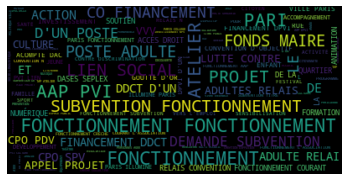

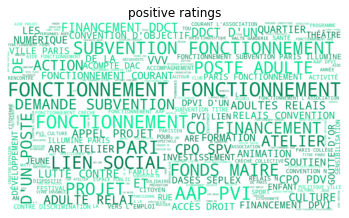

In [40]:
text = filtered_upper

#word cloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests


text = ' '.join(text)

#color 
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 112.0 / 255.0) #change 2nr value here for color 
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)  #change wordcloud origin here

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=170, 
                      background_color="white",
                      stopwords=['JE','BONJOUR', 'CAR', 'SI', 'LE', "QU'IL", "J'AI"],
                      width=1280,
                      height=720,
                      color_func=random_color_func
                      ).generate(text) #change wordcloud origin here
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("positive ratings")
plt.show()


In [41]:
wordcloud.to_file("POSITIVE.png")